In [7]:
import subprocess
from tqdm import tqdm
from tabulate import tabulate
import matplotlib.pyplot as plt

In [8]:
sparcity = 0.1
Ns = list(range(5, 500 , 25))

In [9]:

Baseline = []
Dijkstra = []
DeltaStepping = []
ParSP2 = []
for n in tqdm(Ns):
    basetime, dijk, delt, parsp = 0,0,0,0
    for seed in range(5):
        command = f"./main {n} {sparcity} {seed} 1 10"
        result = subprocess.run(command, shell=True, capture_output=True, text=True)

        for i in result.stdout.splitlines():
            if "baseline runtime" in i: basetime += int(i.split()[-1])
            if "dijkstra's runtime" in i: dijk += int(i.split()[-1])
            if "delta stepping runtime" in i: delt += int(i.split()[-1])
            if "parSP2 runtime" in i: parsp += int(i.split()[-1])
            
    Baseline.append(basetime/5)
    Dijkstra.append(dijk/5)
    DeltaStepping.append(delt/5)
    ParSP2.append(parsp/5)

100%|██████████| 20/20 [06:08<00:00, 18.44s/it]


In [10]:
print(Baseline)
print(Dijkstra)
print(DeltaStepping)

[514.6, 18113.2, 45828.0, 98509.4, 177596.6, 294595.4, 406388.6, 608236.2, 729866.6, 993995.4, 1299491.8, 1535744.2, 1949173.8, 2358783.0, 2683845.6, 3297082.0, 3676811.4, 4140182.4, 5005571.8, 5552871.6]
[563.2, 14687.2, 45761.0, 103339.8, 177457.6, 333585.8, 406638.0, 608359.6, 792650.0, 989988.6, 1340883.8, 1499876.6, 1946507.2, 2380368.8, 2694154.6, 3345054.4, 3702297.6, 4214760.8, 5067186.0, 5568674.6]
[134.6, 2479.2, 5470.8, 9315.0, 13467.4, 20256.0, 27996.4, 35359.4, 45548.2, 57349.4, 70404.8, 84557.4, 101479.6, 113714.6, 128042.2, 150209.8, 174231.4, 198150.6, 222022.0, 246221.4]


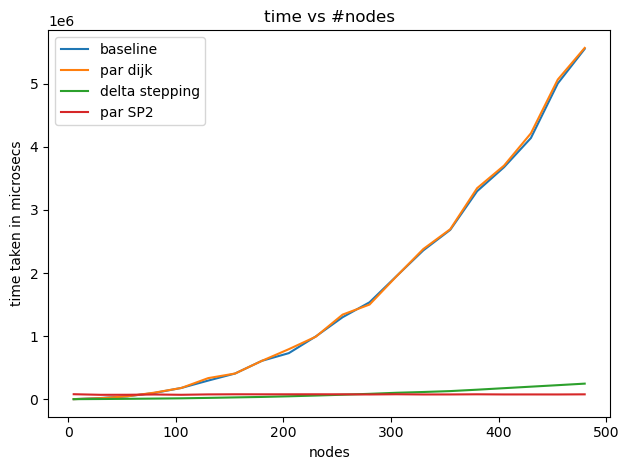

In [11]:
plt.title('time vs #nodes')
plt.xlabel('nodes')
plt.ylabel('time taken in microsecs')
plt.plot(Ns,Baseline, label = 'baseline')
plt.plot(Ns, Dijkstra, label = 'par dijk')
plt.plot(Ns, DeltaStepping, label = 'delta stepping')
plt.plot(Ns, ParSP2, label = 'par SP2')
plt.tight_layout()
plt.legend()

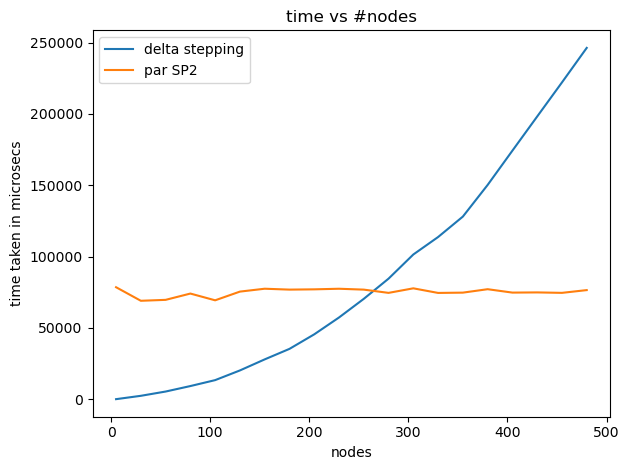

In [12]:
plt.title('time vs #nodes')
plt.xlabel('nodes')
plt.ylabel('time taken in microsecs')
plt.plot(Ns, DeltaStepping, label = 'delta stepping')
plt.plot(Ns, ParSP2, label = 'par SP2')
plt.tight_layout()
plt.legend()

In [27]:
Baseline = []
Dijkstra = []
DeltaStepping = []
ParSP2 = []

trials =10 
S = [i/10 for i in range(10)]
for s in tqdm(S):
    basetime, dijk, delt, parsp = 0,0,0,0
    for seed in range(trials):
        command = f"./main 150 {s} {seed} 1 10"
        result = subprocess.run(command, shell=True, capture_output=True, text=True)

        for i in result.stdout.splitlines():
            if "baseline runtime" in i: basetime += int(i.split()[-1])
            if "dijkstra's runtime" in i: dijk += int(i.split()[-1])
            if "delta stepping runtime" in i: delt += int(i.split()[-1])
            if "parSP2 runtime" in i: parsp += int(i.split()[-1])
            
    Baseline.append(basetime/trials)
    Dijkstra.append(dijk/trials)
    DeltaStepping.append(delt/trials)
    ParSP2.append(parsp/trials)

  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [01:29<00:00,  8.90s/it]


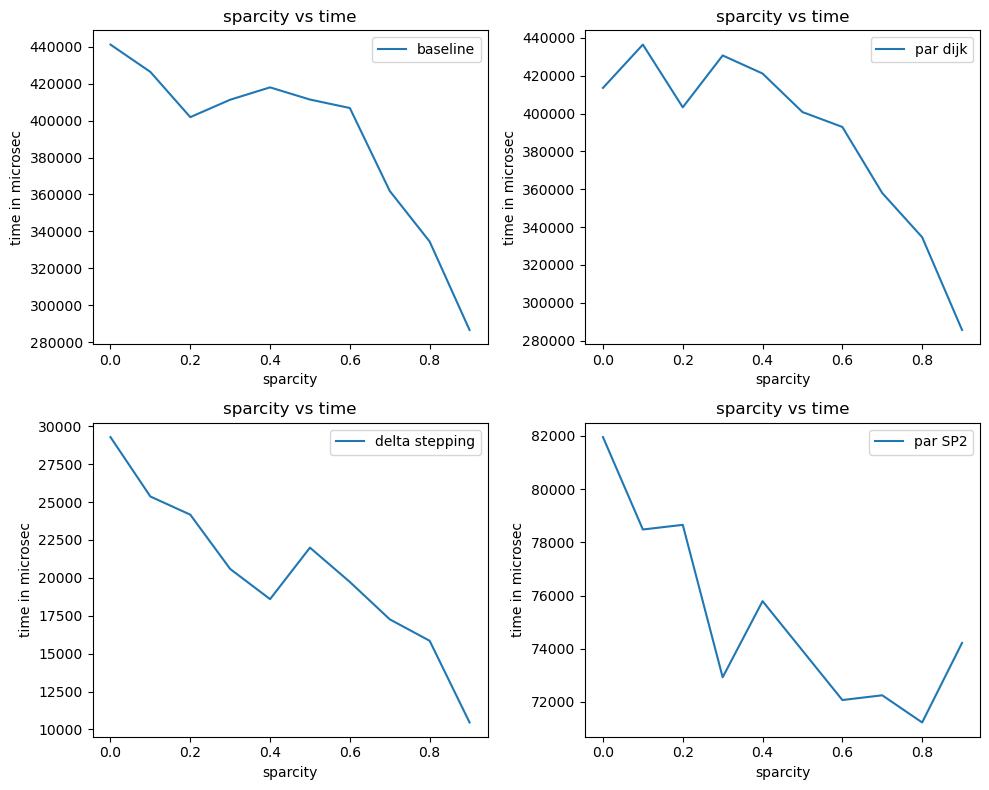

In [35]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot data on each subplot
axs[0, 0].plot(S, Baseline, label='baseline')
axs[0, 1].plot(S, Dijkstra, label='par dijk')
axs[1, 0].plot(S, DeltaStepping, label='delta stepping')
axs[1, 1].plot(S, ParSP2, label='par SP2')

for ax in axs.flat: 
    ax.legend()
    ax.set_title('sparcity vs time')
    ax.set_xlabel('sparcity')
    ax.set_ylabel('time in microsec')
plt.tight_layout()
plt.show()